# Flights analysis - exploring and preprocessing - set "a"

In this type preprocessing, which we denote "a", we divide Airline into 3 groups (in contrast to "b") depending on the status of an airline: standard, regional and cheap. Therefore they will be treated as cathegorical variables.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

## Load data

In [2]:
data = pd.read_csv("airlines_delay.csv")
data

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [3]:
# Drop Flight which refers to the number of a flight and is not needed
data = data.drop(["Flight"], axis=1)
data

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...
539377,530.0,72.0,OO,GEG,SEA,5,1
539378,560.0,115.0,WN,LAS,DEN,4,1
539379,827.0,74.0,EV,CAE,ATL,2,1
539380,715.0,65.0,WN,BWI,BUF,4,1


In [4]:
data1 = data.copy

## General info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         539382 non-null  float64
 1   Length       539382 non-null  float64
 2   Airline      539382 non-null  object 
 3   AirportFrom  539382 non-null  object 
 4   AirportTo    539382 non-null  object 
 5   DayOfWeek    539382 non-null  int64  
 6   Class        539382 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 28.8+ MB


In [6]:
data.describe()

,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000
mean,802.728161,132.202104,3.929666,0.445443
std,278.045546,70.117045,1.914666,0.497015
min,10.000000,0.000000,1.000000,0.000000
25%,565.000000,81.000000,2.000000,0.000000
50%,795.000000,115.000000,4.000000,0.000000
75%,1035.000000,162.000000,5.000000,1.000000
max,1439.000000,655.000000,7.000000,1.000000


## Preprocessing 

### Checking if data are balanced

In [7]:
data["Class"].sum()/data["Class"].shape[0]

0.44544311823531374

***
The dataset is quite well balanced.
***

### Airline

In [8]:
set(data["Airline"])

{'9E',
 'AA',
 'AS',
 'B6',
 'CO',
 'DL',
 'EV',
 'F9',
 'FL',
 'HA',
 'MQ',
 'OH',
 'OO',
 'UA',
 'US',
 'WN',
 'XE',
 'YV'}

Airline is a cathegorical variable. We can divide all airlines into 3 groups: standard (0), regional (1) and cheap (2):
- 9E - reg - 1
- AA - std - 0
- AS - std - 0
- B6 - che - 2
- CO - std - 0
- DL - std - 0
- EV - che - 2
- F9 - che - 2
- FL - che - 2
- HA - std - 0
- MQ - reg - 1
- OH - reg - 1
- OO - reg - 1
- UA - std - 0
- US - std - 0
- WN - che - 2
- XE - std - 0
- YV - reg - 1


In [9]:
# Create the dictionary to group airlines depending on their status
airline_dict = {"9E":1, "AA":0, "AS":0, "B6":2, "CO":0, "DL":0, "EV":2, "F9":2, "FL":2, "HA":0,
                "MQ":1, "OH":1, "OO":1, "UA":0, "US":0, "WN":2, "XE":0, "YV":1}

In [10]:
data["Airline"] = data["Airline"].map(airline_dict)

In [11]:
# Extract dummies
airline_columns = pd.get_dummies(data["Airline"])
airline_columns

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
539377,0,1,0
539378,0,0,1
539379,0,0,1
539380,0,0,1


In [12]:
# Add new columns to dataframe:
data = pd.concat([data, airline_columns], axis=1)
data

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,0,1,2
0,1296.0,141.0,0,ATL,HOU,1,0,1,0,0
1,360.0,146.0,1,COS,ORD,4,0,0,1,0
2,1170.0,143.0,2,BOS,CLT,3,0,0,0,1
3,1410.0,344.0,0,OGG,PHX,6,0,1,0,0
4,692.0,98.0,2,BMI,ATL,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
539377,530.0,72.0,1,GEG,SEA,5,1,0,1,0
539378,560.0,115.0,2,LAS,DEN,4,1,0,0,1
539379,827.0,74.0,2,CAE,ATL,2,1,0,0,1
539380,715.0,65.0,2,BWI,BUF,4,1,0,0,1


In [13]:
# Remove Airline column:
data = data.drop(["Airline"], axis=1)

In [14]:
# Rename columns:
data.columns.values

array(['Time', 'Length', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class',
       0, 1, 2], dtype=object)

In [15]:
column_names = ['Time', 'Length', 'AirportFrom', 'AirportTo', 
                'DayOfWeek', 'Class', 'AirlineStd', 'AirlineReg', 'AirlineCheap']

In [16]:
data.columns = column_names
data

,Time,Length,AirportFrom,AirportTo,DayOfWeek,Class,AirlineStd,AirlineReg,AirlineCheap
0,1296.0,141.0,ATL,HOU,1,0,1,0,0
1,360.0,146.0,COS,ORD,4,0,0,1,0
2,1170.0,143.0,BOS,CLT,3,0,0,0,1
3,1410.0,344.0,OGG,PHX,6,0,1,0,0
4,692.0,98.0,BMI,ATL,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...
539377,530.0,72.0,GEG,SEA,5,1,0,1,0
539378,560.0,115.0,LAS,DEN,4,1,0,0,1
539379,827.0,74.0,CAE,ATL,2,1,0,0,1
539380,715.0,65.0,BWI,BUF,4,1,0,0,1


In [17]:
# Reorder columns:
reordered_column_names = ['Time', 'Length', 'AirlineStd', 'AirlineReg', 
                          'AirlineCheap','AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']

In [18]:
data = data[reordered_column_names]
data

,Time,Length,AirlineStd,AirlineReg,AirlineCheap,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,1,0,0,ATL,HOU,1,0
1,360.0,146.0,0,1,0,COS,ORD,4,0
2,1170.0,143.0,0,0,1,BOS,CLT,3,0
3,1410.0,344.0,1,0,0,OGG,PHX,6,0
4,692.0,98.0,0,0,1,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...,...
539377,530.0,72.0,0,1,0,GEG,SEA,5,1
539378,560.0,115.0,0,0,1,LAS,DEN,4,1
539379,827.0,74.0,0,0,1,CAE,ATL,2,1
539380,715.0,65.0,0,0,1,BWI,BUF,4,1


In [19]:
# Remove the column "AirlineStd" as it is the baseline to which we compare other airlines
data = data.drop(["AirlineStd"], axis=1)
data

,Time,Length,AirlineReg,AirlineCheap,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,0,0,ATL,HOU,1,0
1,360.0,146.0,1,0,COS,ORD,4,0
2,1170.0,143.0,0,1,BOS,CLT,3,0
3,1410.0,344.0,0,0,OGG,PHX,6,0
4,692.0,98.0,0,1,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,530.0,72.0,1,0,GEG,SEA,5,1
539378,560.0,115.0,0,1,LAS,DEN,4,1
539379,827.0,74.0,0,1,CAE,ATL,2,1
539380,715.0,65.0,0,1,BWI,BUF,4,1


### AirportFrom and AirportTo

In [20]:
data["AirportFrom"].value_counts()

ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

There are 293 different airports in the dataset, but they are used with different frequencies.

In [21]:
# Define function to group airports into 7 groups according to number of flights departing from (arriving at) them.
# Similarly to Airlines, Airports will become then numerical variables 
def group_cities(airport):
    
    vc = airport.value_counts()

    a = vc.index.tolist()
    b = vc.values.tolist()

    dep = {}
    for i in range(len(a)):
        if b[i]>=30000:
            dep[a[i]]=0
        elif 30000>b[i]>=20000:
            dep[a[i]]=1
        elif 20000>b[i]>=10000:
            dep[a[i]]=2
        elif 10000>b[i]>=5000:
            dep[a[i]] = 3
        elif 5000>b[i]>=1000:
            dep[a[i]]=4
        elif 1000>b[i]>=500:
            dep[a[i]]=5
        else:
            dep[a[i]]=6
            
    airport = airport.map(dep)
        
    return(airport)
    
data["AirportFrom"] = group_cities(data["AirportFrom"])
data["AirportTo"] = group_cities(data["AirportTo"])

data

,Time,Length,AirlineReg,AirlineCheap,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,0,0,0,4,1,0
1,360.0,146.0,1,0,4,1,4,0
2,1170.0,143.0,0,1,3,2,3,0
3,1410.0,344.0,0,0,4,2,6,0
4,692.0,98.0,0,1,6,0,4,0
...,...,...,...,...,...,...,...,...
539377,530.0,72.0,1,0,4,3,5,1
539378,560.0,115.0,0,1,2,2,4,1
539379,827.0,74.0,0,1,5,0,2,1
539380,715.0,65.0,0,1,3,4,4,1


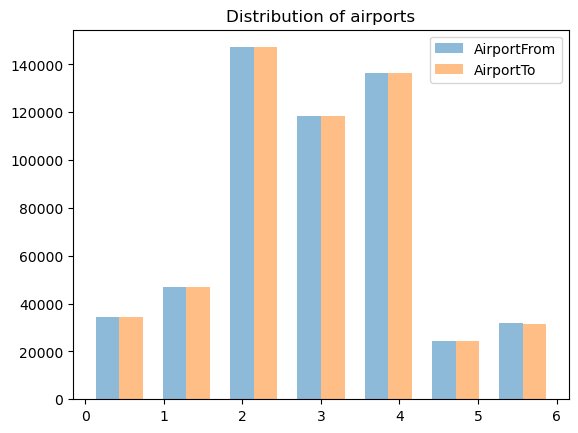

In [22]:
# Check the distribution of groups of airports
num_bins = 7
entries, bin_edges, patches = plt.hist([data["AirportFrom"], data["AirportTo"]], bins=num_bins, alpha=0.5, 
                                       rwidth=0.7, density=False, label=["AirportFrom", "AirportTo"]
                                      )

plt.legend(loc="upper right")
plt.title('Distribution of airports')
plt.show()

### Length

In [23]:
a = data["Length"].min()
b = data["Length"].max()
print(a, b)

0.0 655.0


Text(0.5, 1.0, "Distribution of flight's length")

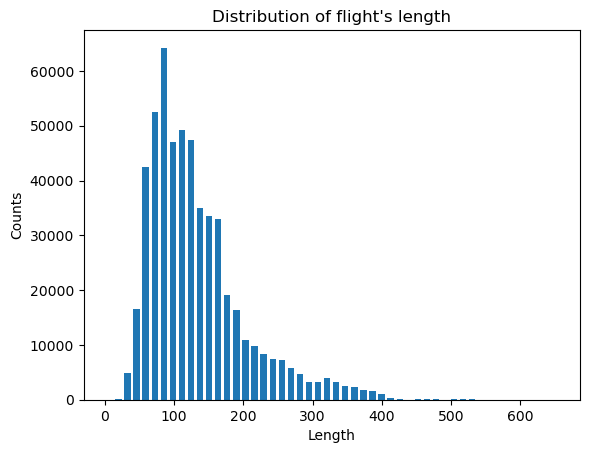

In [24]:
# Plot the distribution of Length 
num_bins = 50
entries, bin_edges, patches = plt.hist(data["Length"], bins=num_bins, rwidth=0.7, density=False)

plt.xlabel('Length')
plt.ylabel('Counts')
plt.title('Distribution of flight\'s length')


### Time

In the "Time" column, time is given in minutes after midnight. For example: 1296 → 21:36h.


In [25]:
a = data["Time"].min()
b = data["Time"].max()
print(a, b)

10.0 1439.0


Text(0.5, 1.0, 'Distribution of time')

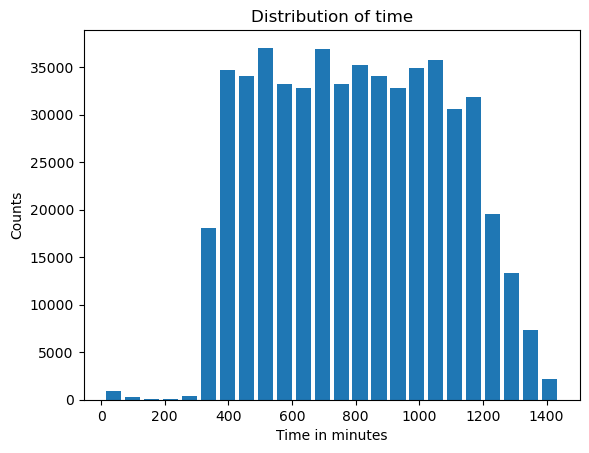

In [26]:
# Plot the distribution of Time 
num_hours = 24
entries, bin_edges, patches = plt.hist(data["Time"], bins=num_hours, rwidth=0.8, density=False)

plt.xlabel('Time in minutes')
plt.ylabel('Counts')
plt.title('Distribution of time')



Note that:

The Time column could be treated as a cathegorical variable. 

One could create a model where it can be checked how the target depends on the flight's part of a day. For example, one could divide a day into 4 parts: night, morning, afternoon, evening:

- night: 0 - 359, (00:00 - 05:59) - 0
- morning: 360 - 719, (06:00 - 11:59) - 1
- afternoon: 720 - 1079 (12:00 - 17:59) - 2
- evening: 1080 - 1440 (18:00 - 23:59) - 3

This is left for future.

### DayOfWeek

In [27]:
data["DayOfWeek"].unique()

array([1, 4, 3, 6, 7, 2, 5])

Text(0.5, 1.0, 'Distribution of DayOfWeek')

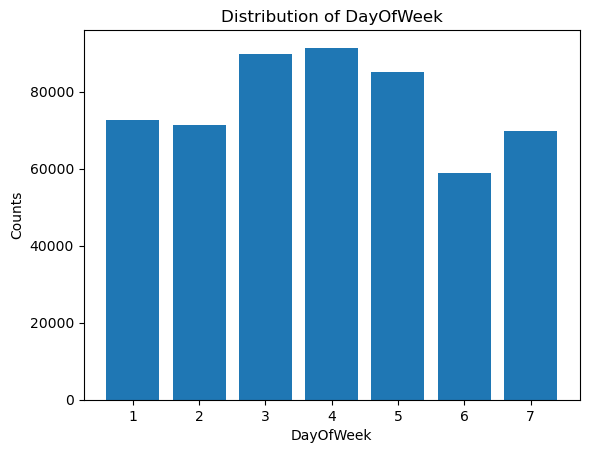

In [28]:
# Plot the distribution of DayOfWeek 
entries, bin_edges, patches = plt.hist(data["DayOfWeek"], bins=np.arange(0.5,8.5), rwidth=0.8, density=False)

plt.xlabel('DayOfWeek')
plt.ylabel('Counts')
plt.title('Distribution of DayOfWeek')

### Checking multicollinearity

In [29]:
# Import vif method from models of statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define function that will check for multiple collinearity
variables = data[["Time", "Length", "AirportFrom", "AirportTo", "DayOfWeek"]]

# Syntax of vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif
# We accept VIF < 10, so no high multicollinearity in this case.

,VIF,features
0,7.250984,Time
1,3.681223,Length
2,3.578174,AirportFrom
3,4.261433,AirportTo
4,4.603335,DayOfWeek


### Correlation

In [30]:
data.corr()

,Time,Length,AirlineReg,AirlineCheap,AirportFrom,AirportTo,DayOfWeek,Class
Time,1.000000,-0.020610,0.001205,0.013796,-0.146782,0.153148,0.001272,0.150457
Length,-0.020610,1.000000,-0.281446,-0.096662,-0.125750,-0.183217,0.013398,0.040488
AirlineReg,0.001205,-0.281446,1.000000,-0.385621,0.132448,0.132418,-0.001276,-0.078408
AirlineCheap,0.013796,-0.096662,-0.385621,1.000000,0.082512,0.083056,-0.002034,0.160790
AirportFrom,-0.146782,-0.125750,0.132448,0.082512,1.000000,-0.373692,-0.002526,-0.042565
AirportTo,0.153148,-0.183217,0.132418,0.083056,-0.373692,1.000000,-0.002053,0.037971
DayOfWeek,0.001272,0.013398,-0.001276,-0.002034,-0.002526,-0.002053,1.000000,-0.026198
Class,0.150457,0.040488,-0.078408,0.160790,-0.042565,0.037971,-0.026198,1.000000


***
The biggest negative correlation coefficient is -0.385 for AirlineReg and AirlineCheap, which is treated as quite weak. 
All other correlation coefficients are even weaker.
***

## Final checkpoint

In [31]:
data_preprocessed = data.copy()

## Saving data

In [32]:
data_preprocessed.to_csv("airlines_delay_preprocessed_a.csv", index=False)